<a href="https://www.kaggle.com/code/lalit7881/random-forest-outperforms-other-models-with-100?scriptVersionId=293416880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-sorghum-supply-and-disappearance-1975-2025/sorghum_annual_supply_disappearance.csv


## Title:
US Sorghum Supply & Use Trends (1975–2025)

## Description:
This dataset/report presents a comprehensive view of the United States sorghum supply and disappearance from 1975 through 2025. It tracks annual measures of total production, beginning stocks, imports, and supply availability, alongside key disappearance categories such as feed and residual use, exports, food and industrial use, and ending stocks. Over the five-decade period, the data reflects how sorghum’s role in domestic agriculture and global markets has evolved—highlighting shifts in production driven by weather, technology, and policy; fluctuating demand from livestock feed and ethanol industries; changes in export markets; and inventory dynamics. By capturing historical trends and recent projections, this analysis helps stakeholders understand long-term supply patterns, utilization shifts, and the balance between domestic use and international trade for US sorghum.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/us-sorghum-supply-and-disappearance-1975-2025/sorghum_annual_supply_disappearance.csv")

In [3]:
df.head()

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
0,1976/77,MY September-August,82.3,710.797,0.000,793.097,8.8,2.0,411.082,421.882,253.915,675.797
1,1977/78,MY September-August,117.3,780.944,0.022,898.266,9.4,2.0,447.624,459.024,222.842,681.866
2,1978/79,MY September-August,216.4,731.270,0.002,947.672,9.9,1.8,537.980,549.680,190.092,739.772
3,1979/80,MY September-August,207.9,807.422,0.002,1015.324,10.4,2.0,495.352,507.752,329.672,837.424
4,1980/81,MY September-August,177.9,579.343,0.010,757.253,9.1,2.0,322.594,333.694,293.159,626.853


In [4]:
df.tail()

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
44,2020/21,MY September-August,30.095,372.960,0.029,403.084,5.878,0.905,97.060,103.843,278.923,382.766
45,2021/22,MY September-August,20.318,447.810,0.013,468.141,44.158,0.915,79.952,125.025,295.839,420.864
46,2022/23,MY September-August,47.277,187.785,0.008,235.070,58.387,0.926,42.478,101.791,109.042,210.833
47,2023/24,MY September-August,24.237,317.745,0.021,342.003,23.505,0.783,50.941,75.229,234.063,309.292
48,2024/25,MY September-August,32.711,343.850,0.034,376.595,97.544,0.808,140.463,238.815,97.642,336.457


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marketing_year        49 non-null     object 
 1   period                49 non-null     object 
 2   beginning_stocks      49 non-null     float64
 3   production            49 non-null     float64
 4   imports               49 non-null     float64
 5   total_supply          49 non-null     float64
 6   feed_and_residual     49 non-null     float64
 7   food_seed_industrial  49 non-null     float64
 8   exports               49 non-null     float64
 9   total_domestic_use    49 non-null     float64
 10  total_use             49 non-null     float64
 11  ending_stocks         49 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.7+ KB


In [6]:
df.describe()

,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,133.741061,541.904714,0.404571,676.050347,41.199265,1.234020,281.566469,323.999755,219.169980,543.169735
std,170.900859,207.145263,1.527910,325.841736,33.838722,0.454276,175.237155,157.214520,66.871467,184.516715
min,15.153000,187.785000,0.000000,235.070000,5.336000,0.650000,42.478000,75.229000,63.410000,210.833000
25%,34.032000,381.605000,0.007000,421.708000,15.300000,0.811000,122.730000,194.380000,190.092000,382.766000
50%,54.712000,497.445000,0.021000,555.791000,26.000000,1.192000,236.080000,306.996000,212.083000,503.686000
75%,175.014000,645.741000,0.068000,898.266000,58.387000,1.600000,440.055000,459.024000,259.613000,681.866000
max,743.333000,1120.271000,9.573000,1489.882000,136.139000,2.300000,663.880000,691.580000,351.749000,869.568000


In [7]:
df.isnull().sum()

marketing_year          0
period                  0
beginning_stocks        0
production              0
imports                 0
total_supply            0
feed_and_residual       0
food_seed_industrial    0
exports                 0
total_domestic_use      0
total_use               0
ending_stocks           0
dtype: int64

In [8]:
df.isna()

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.dtypes

marketing_year           object
period                   object
beginning_stocks        float64
production              float64
imports                 float64
total_supply            float64
feed_and_residual       float64
food_seed_industrial    float64
exports                 float64
total_domestic_use      float64
total_use               float64
ending_stocks           float64
dtype: object

In [10]:
df.shape

(49, 12)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['marketing_year', 'period', 'beginning_stocks', 'production', 'imports',
       'total_supply', 'feed_and_residual', 'food_seed_industrial', 'exports',
       'total_domestic_use', 'total_use', 'ending_stocks'],
      dtype='object')

## Data visualizations

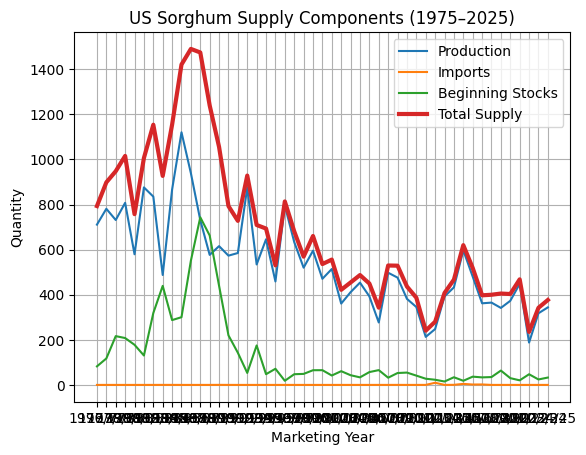

In [13]:
plt.plot(df["marketing_year"], df["production"], label="Production")
plt.plot(df["marketing_year"], df["imports"], label="Imports")
plt.plot(df["marketing_year"], df["beginning_stocks"], label="Beginning Stocks")
plt.plot(df["marketing_year"], df["total_supply"], 
         label="Total Supply", linewidth=3)

plt.title("US Sorghum Supply Components (1975–2025)")
plt.xlabel("Marketing Year")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


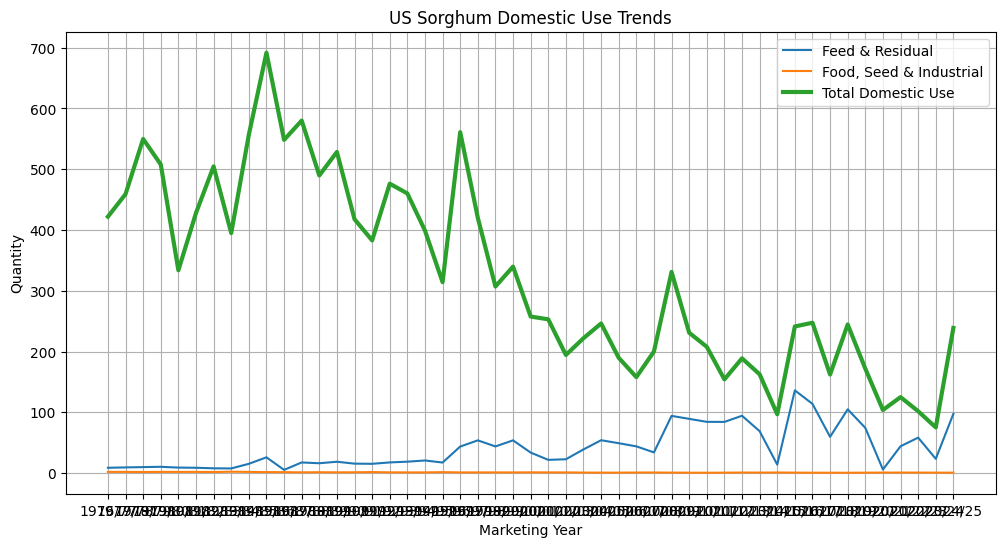

In [14]:
plt.figure(figsize=(12,6))

plt.plot(df["marketing_year"], df["feed_and_residual"], label="Feed & Residual")
plt.plot(df["marketing_year"], df["food_seed_industrial"], label="Food, Seed & Industrial")
plt.plot(df["marketing_year"], df["total_domestic_use"], 
         label="Total Domestic Use", linewidth=3)

plt.title("US Sorghum Domestic Use Trends")
plt.xlabel("Marketing Year")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


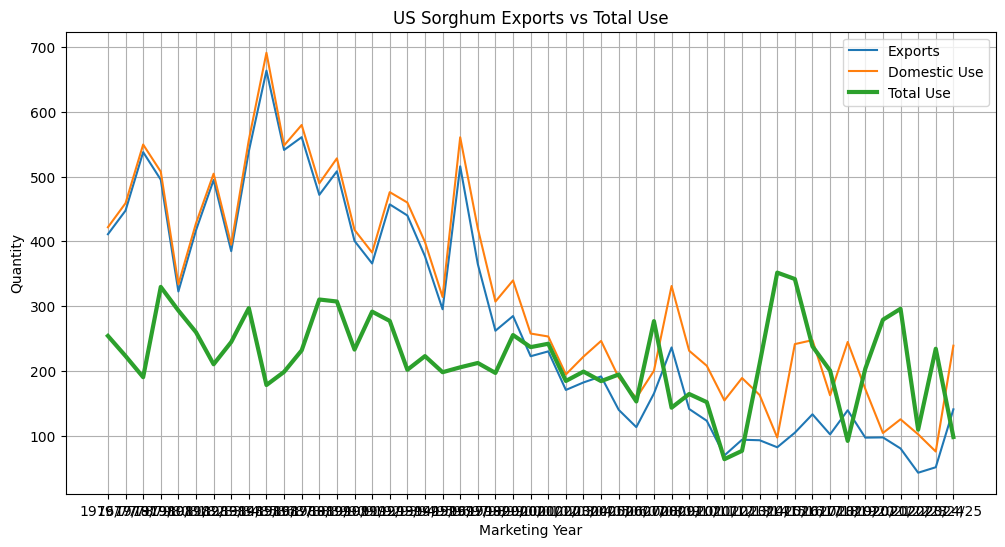

In [15]:
plt.figure(figsize=(12,6))

plt.plot(df["marketing_year"], df["exports"], label="Exports")
plt.plot(df["marketing_year"], df["total_domestic_use"], label="Domestic Use")
plt.plot(df["marketing_year"], df["total_use"], 
         label="Total Use", linewidth=3)

plt.title("US Sorghum Exports vs Total Use")
plt.xlabel("Marketing Year")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


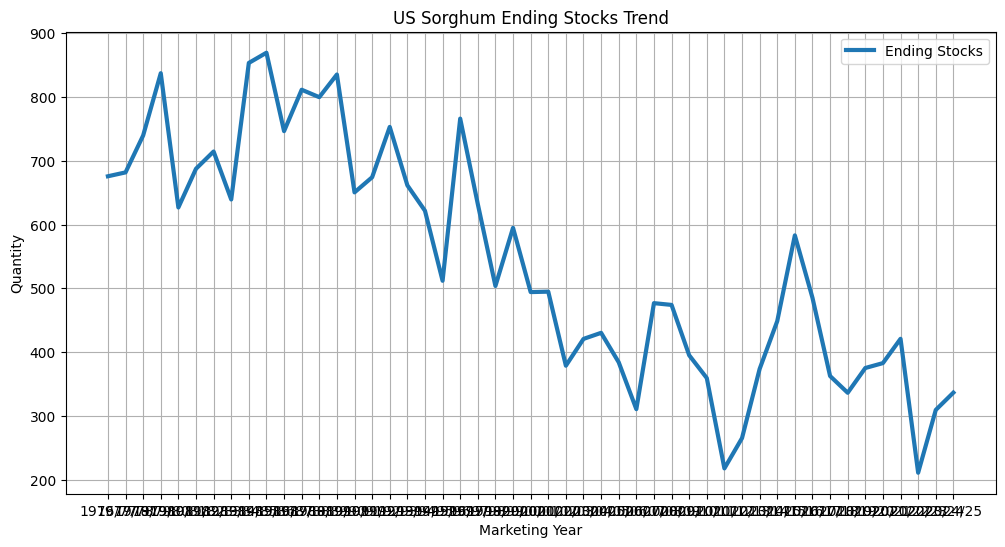

In [16]:
plt.figure(figsize=(12,6))

plt.plot(df["marketing_year"], df["ending_stocks"], 
         label="Ending Stocks", linewidth=3)

plt.title("US Sorghum Ending Stocks Trend")
plt.xlabel("Marketing Year")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


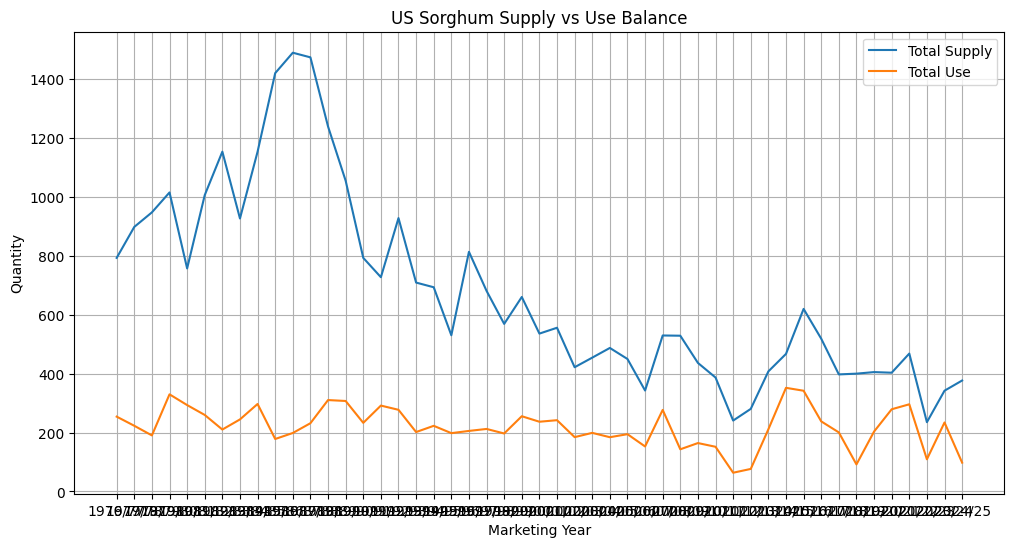

In [17]:
plt.figure(figsize=(12,6))

plt.plot(df["marketing_year"], df["total_supply"], label="Total Supply")
plt.plot(df["marketing_year"], df["total_use"], label="Total Use")

plt.title("US Sorghum Supply vs Use Balance")
plt.xlabel("Marketing Year")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.show()


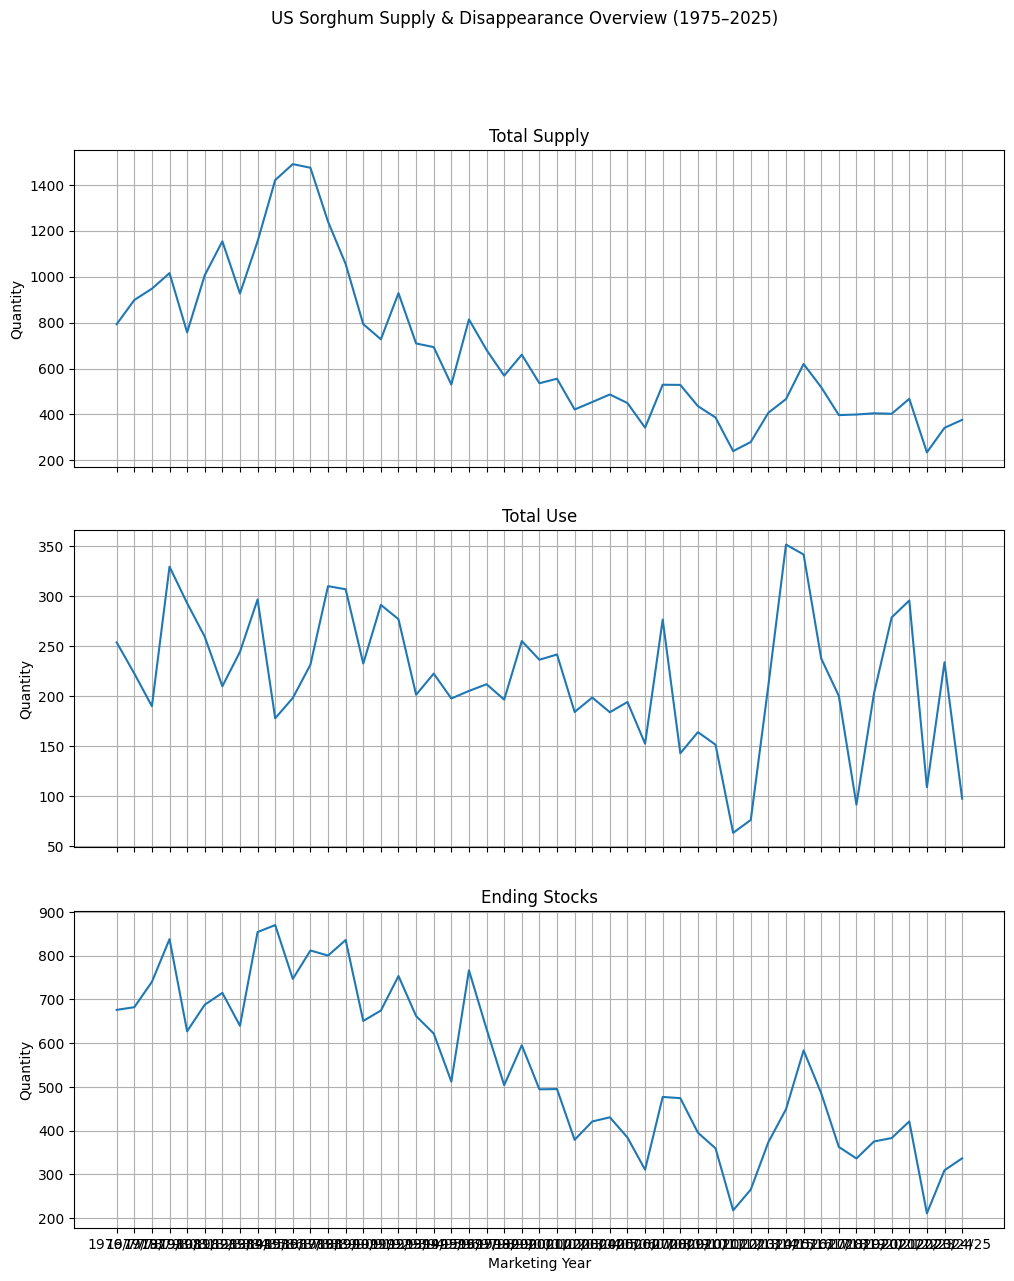

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(12,14), sharex=True)

axs[0].plot(df["marketing_year"], df["total_supply"])
axs[0].set_title("Total Supply")

axs[1].plot(df["marketing_year"], df["total_use"])
axs[1].set_title("Total Use")

axs[2].plot(df["marketing_year"], df["ending_stocks"])
axs[2].set_title("Ending Stocks")

for ax in axs:
    ax.grid(True)
    ax.set_ylabel("Quantity")

axs[2].set_xlabel("Marketing Year")
plt.suptitle("US Sorghum Supply & Disappearance Overview (1975–2025)")
plt.show()


## ML ALgo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
# Convert ending stocks into categorical classes
df["Stock_Level"] = pd.qcut(
    df["ending_stocks"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [21]:
# Select only numeric features
X = df.select_dtypes(include=["int64", "float64"])

# Target
y = df["Stock_Level"]


In [22]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [26]:
accuracy_results = {}

for name, model in models.items():
    
    # Use scaled data where required
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy_results[name] = accuracy_score(y_test, y_pred) * 100


In [27]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy (%)": accuracy_results.values()
}).sort_values(by="Accuracy (%)", ascending=False)

accuracy_df


,Model,Accuracy (%)
1,Decision Tree,90.0
2,Random Forest,90.0
5,Naive Bayes,90.0
4,KNN,80.0
0,Logistic Regression,70.0
3,SVM,70.0


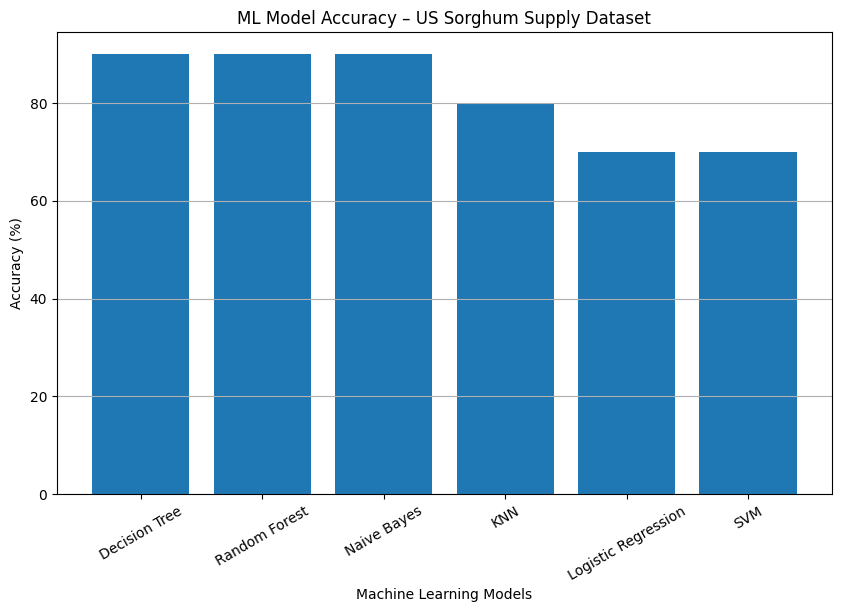

In [28]:
plt.figure(figsize=(10,6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy (%)"])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("ML Model Accuracy – US Sorghum Supply Dataset")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.show()


## Thank you...pls upvote!!!!